# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [7]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin",
                                           language="en",
                                           sort_by="relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 5183,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
   'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
   'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
   'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
   'publishedAt': '2020-12-03T22:00:00Z',
   'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it wor

In [12]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum",
                                           language="en",
                                           sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 1356,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

In [13]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sent_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sent_df = bitcoin_sent_df[cols]

bitcoin_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950


In [14]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sent_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sent_df = ethereum_sent_df[cols]

ethereum_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_sent_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.244032,0.078579,0.017579,0.903789
std,0.356654,0.078581,0.035419,0.087501
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.827500
50%,0.202300,0.072000,0.000000,0.897000
75%,0.532650,0.157000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [16]:
# Describe the Ethereum Sentiment
ethereum_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.091955,0.044550,0.014050,0.941400
std,0.251162,0.077609,0.046844,0.101239
min,-0.340000,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.064000,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score with a value of 0.078.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score with a value of 0.8779.

Q. Which coin had the highest positive score?

A: Ethereum has the highest posutuve score with a value of 0.318.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rawlricsumner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rawlricsumner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Expand the default stopwords list if necessary
lem = WordNetLemmatizer()
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    #Create a list of the words 
    sw = set(stopwords.words('english'))
    #Convert the words to lowercase
    words = list(filter(lambda x: x.lower(), words))
    #Remove the punctuation
    words = list(filter(lambda y: y not in punctuation, words))
    #Remove the stop words
    words = list(filter(lambda z: z.lower() not in sw, words))
    #Lemmatize Words into root words
    tokens = [lem.lemmatize(word) for word in words]
    
    return tokens

In [23]:
# Create a new tokens column for bitcoin
bitcoin_sent_df['tokens'] = bitcoin_sent_df.text.apply(tokenizer)
bitcoin_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[Visa, partnered, cryptocurrency, startup, Blo..."
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826,"[reaching, previous, all-time, high, November,..."
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928,"[almost, three, year, day, since, price, Bitco..."
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781,"[Everything, dumb, work, 2020, come, close, cr..."
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[November, 2017, absolutely, massive, two-mont..."


In [24]:
# Create a new tokens column for ethereum
ethereum_sent_df['tokens'] = ethereum_sent_df.text.apply(tokenizer)
ethereum_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, representation, virtual, currenc..."
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, Representations, virtual, curren..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
ngrams_bitcoin = [item for sublist in bitcoin_sent_df.tokens.to_list() for item in sublist]
bitcoin_counts = Counter(ngrams(ngrams_bitcoin, n=2))
bitcoin_counts.most_common(10)

[(('virtual', 'currency'), 3),
 (('FILE', 'PHOTO'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('all-time', 'high'), 2),
 (('year', 'day'), 2),
 (('breaking', '20,000'), 2),
 (('image', 'copyrightGetty'), 2),
 (('copyrightGetty', 'Images'), 2),
 (('Images', 'Bitcoin'), 2)]

In [28]:
# Generate the Ethereum N-grams where N=2
ngrams_ethereum = [item for sublist in ethereum_sent_df.tokens.to_list() for item in sublist]
ethereum_counts = Counter(ngrams(ngrams_ethereum, n=2))
ethereum_counts.most_common(10)

[(('virtual', 'currency'), 11),
 (('FILE', 'PHOTO'), 10),
 (('currency', 'Bitcoin'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 9),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 8),
 (('Bitcoin', 'seen'), 8),
 (('LONDON', 'Reuters'), 7),
 (('Ruvic/Illustration', 'LONDON'), 6),
 (('representation', 'virtual'), 6)]

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_counts)

[(('virtual', 'currency'), 3),
 (('FILE', 'PHOTO'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('all-time', 'high'), 2),
 (('year', 'day'), 2),
 (('breaking', '20,000'), 2),
 (('image', 'copyrightGetty'), 2),
 (('copyrightGetty', 'Images'), 2),
 (('Images', 'Bitcoin'), 2)]

In [31]:
# Get the top 10 words for Ethereum
token_count(ethereum_counts)

[(('virtual', 'currency'), 11),
 (('FILE', 'PHOTO'), 10),
 (('currency', 'Bitcoin'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 9),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 8),
 (('Bitcoin', 'seen'), 8),
 (('LONDON', 'Reuters'), 7),
 (('Ruvic/Illustration', 'LONDON'), 6),
 (('representation', 'virtual'), 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

<function matplotlib.pyplot.show(close=None, block=None)>

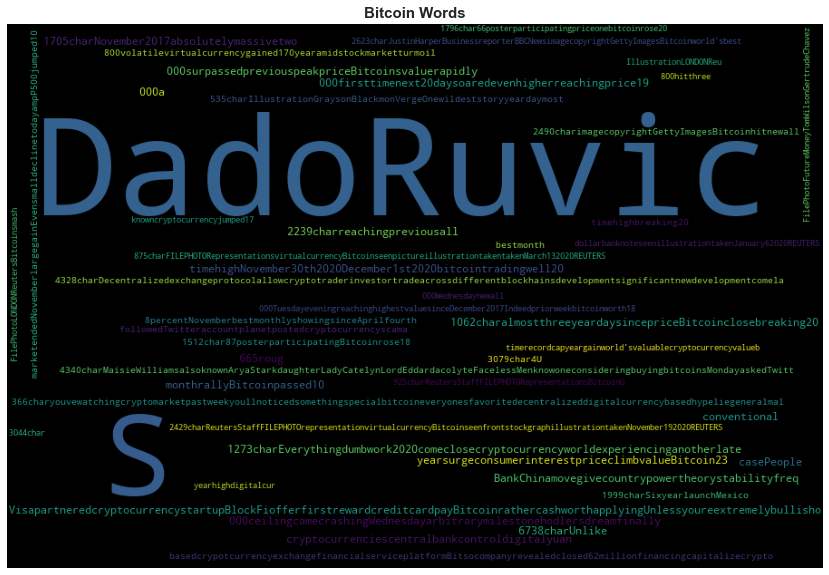

In [34]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=900, height=600, max_words=100).generate("".join(ngrams_bitcoin))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":15, "fontweight":"bold"}
plt.title("Bitcoin Words", fontdict=fontdict)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

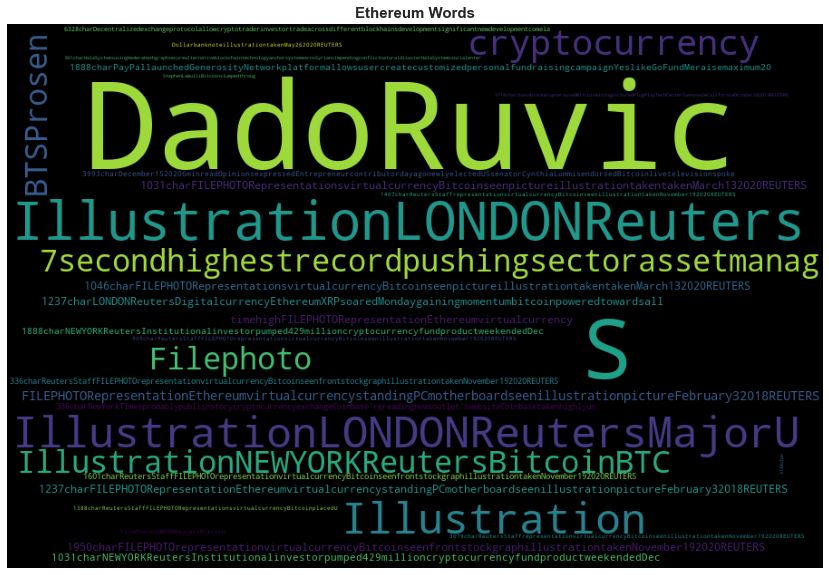

In [36]:
# Generate the Ethereum word cloud
wc = WordCloud(width=900, height=600, max_words=100).generate("".join(ngrams_ethereum))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":15, "fontweight":"bold"}
plt.title("Ethereum Words", fontdict=fontdict)
plt.show

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
article = bitcoin_headlines["articles"]
bitcoin_n = " "
for i in bitcoin_headlines["articles"]:
    bitcoin_n+=str(i)
bitcoin_n

' {\'source\': {\'id\': None, \'name\': \'Lifehacker.com\'}, \'author\': \'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker\', \'title\': \'Is the New Visa Bitcoin Rewards Card Worth It?\', \'description\': \'Visa\\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…\', \'url\': \'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159\', \'urlToImage\': \'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png\', \'publishedAt\': \'2020-12-03T22:00:00Z\', \'content\': \'Visa\\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extrem

In [46]:

# Run the NER processor on all of the text
doc_btc = nlp(bitcoin_n)

# Add a title to the document

doc_btc.user_data["title"] = "Bitcoin NER"

In [47]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [48]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

Lifehacker.com ORG
Mike Winters PERSON
Two Cents MONEY
Mike Winters PERSON
Lifehacker ORG
the New Visa Bitcoin Rewards Card ORG
first ORDINAL
Bitcoin GPE
2020-12-03T22:00:00Z' DATE
first ORDINAL
Bitcoin GPE
TechCrunch PERSON
Bitcoin GPE
20k MONEY
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Bitcoin GPE
the past two months DATE
CoinMarket ORG
2020-12-16T17:12:40Z' DATE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Gizmodo.com ORG
Rhett Jones' PERSON
Bitcoin Blows PERSON
20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
https://gizmodo.com/bitcoin-blows-past-20-000-milestone-1845894176 PRODUCT
2020-12-16T15:15:00Z' DATE
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
Alex Wilhelm' PERSON
https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3_GRY.jpg?w=533' WORK_OF_ART
2020-12-17T16:01:42Z' DATE
2020 DATE
late-year D

---

## Ethereum NER

In [50]:
# Concatenate all of the bitcoin text together
article = ethereum_headlines["articles"]
ethereum_ner = " "
for i in ethereum_headlines["articles"]:
    ethereum_ner+=str(i)
ethereum_ner

' {\'source\': {\'id\': \'reuters\', \'name\': \'Reuters\'}, \'author\': \'Tom Wilson\', \'title\': \'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK\', \'description\': \'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\', \'url\': \'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI\', \'urlToImage\': \'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800\', \'publishedAt\': \'2020-11-23T14:16:00Z\', \'content\': \'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\\r\\nLONDON (Reuters) - … [+1237 chars]\'}{\'source\': {\'id\': \'reuters\', \'name\': \'Reuters\'}, \'author\': \'Tom Wilson\', \'title\': \'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK\', \'description

In [51]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_ner)

# Add a title to the document

doc_eth.user_data["title"] = "Ethereum NER"

In [52]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [53]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters India' ORG
XRP ORG
Monday DATE
2020-11-23T14:48:00Z' DATE
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:35:00Z' DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:46:00Z' DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
India GPE
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-1